In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Check the effect of power sector reform

In [4]:
all_coal_data = pd.read_csv("_all_temporal_coal_indep_var.csv")
all_coal_data

,Country Code,year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_duration_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,...,R_Liberalization,R_Corp,StateCapacity,StateCapacity_sd,tax_inc_tax,tax_trade_tax,taxrev_gdp,WG_GovEff,WG_Reg,WG_Voice
0,DEU,1927,36.0,0.2,1927.0,0.0,36.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DEU,1928,36.0,0.2,1927.0,1.0,36.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DEU,1929,36.0,0.2,1927.0,2.0,36.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DEU,1930,36.0,0.2,1927.0,3.0,36.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DEU,1931,36.0,0.2,1927.0,4.0,36.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,BEL,2022,0.0,0.0,0.0,0.0,2865.0,2188.0,0.0,677.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3879,PER,2022,0.0,0.0,0.0,0.0,135.0,135.0,135.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3880,PRT,2022,0.0,0.0,0.0,0.0,2028.0,1296.0,0.0,732.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3881,SWE,2022,0.0,0.0,0.0,0.0,291.0,291.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
all_coal_data.columns

Index(['Country Code', 'year', 'Coal_Current_MW', 'Coal_AnnualMtCO2',
       'Coal_start_year', 'Coal_duration_year', 'Coal_Peak_MW', 'Coal_Ret_MW',
       'Coal_EarlyRet_MW', 'Coal_Tran_MW', 'Coal_Share_Ret',
       'Coal_Share_EarlyRet', 'Coal_Share_Tran', 'Coal_Share_PhasedOut',
       'Coal_logCurrent_MW', 'Survey_Worry_%', 'Survey_Belief_%',
       'Survey_FutureGen_%', 'Survey_Personal_%', 'Survey_FossilMore_%',
       'Survey_FossilLess_%', 'GDPpc_2017$', 'WDI_Manu_GDP_%',
       'WDI_CoalRents_%', 'WDI_OilRents_%', 'WDI_NGRents_%', 'WDI_Coal_El_%',
       'WDI_NG_El_%', 'WDI_Fossil_El_%', 'logGDPpc', 'BP_GasReserve_tM3',
       'BP_GasProduction_bM3', 'BP_CoalProduction_mTon', 'BP_CoalReserve_mTon',
       'BP_GasR2P_yr', 'BP_CoalR2P_yr', 'HHI_LNG_Import', 'Value_LNG_Import',
       'contiguity_LNG_Import', 'agree_LNG_Import', 'sanction_LNG_Import',
       'common_language_LNG_Import', 'colony_LNG_Import', 'HHI_LNG_Export',
       'Value_LNG_Export', 'contiguity_LNG_Export', 'a

In [91]:
last_year_data = all_coal_data[all_coal_data["year"]==2022]
last_year_data = last_year_data.sort_values(by="Coal_Peak_MW",ascending=False)
last_year_data_top = last_year_data.iloc[:15]
top_peak_MW_country = list(last_year_data_top["Country Code"])

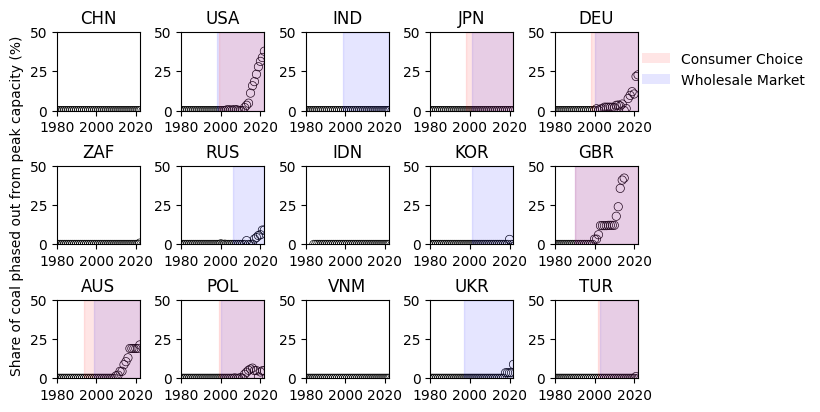

In [100]:
plt.rc('figure', figsize=(7.5,4.5))
f, axes = plt.subplots(3,5)
f.subplots_adjust(hspace=0.7,wspace=0.5)
country_list = top_peak_MW_country
country_x = [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2]
country_y = [0,1,2,3,4,0,1,2,3,4,0,1,2,3,4]
for c_name in top_peak_MW_country:
    c_ind = top_peak_MW_country.index(c_name)
    this_ax = axes[country_x[c_ind],country_y[c_ind]]
    select_data = all_coal_data[all_coal_data["Country Code"]==c_name]
    sns.scatterplot(data = select_data, x="year", y="Coal_Share_PhasedOut",facecolor="None",edgecolor="black",ax=this_ax,legend=None)
    mask = select_data["R_WholeSale"] == 1
    if select_data[mask]["year"].min() < 2022:
        this_ax.axvspan(select_data[mask]["year"].min(), 2022, color='blue', alpha=0.1, zorder=1)
    mask2 = select_data["R_Choice"] == 1
    if select_data[mask2]["year"].min() < 2022:
        this_ax.axvspan(select_data[mask2]["year"].min(), 2022, color='red', alpha=0.1, zorder=1)
    this_ax.set_title(c_name)
    this_ax.set_xlabel(None)
    if c_ind==5:
        this_ax.set_ylabel("Share of coal phased out from peak capacity (%)")
    else:
        this_ax.set_ylabel(None)
    this_ax.set_ylim([0,50])
    this_ax.set_xlim([1980,2022])
            
legend_elements = [Patch(facecolor="red", alpha=0.1, edgecolor=None, label="Consumer Choice"),
                   Patch(facecolor="blue", alpha=0.1,edgecolor=None, label="Wholesale Market")]
axes[0,4].legend(handles=legend_elements,bbox_to_anchor=(0.9, 0.9),loc='upper left',frameon=False)

### plot all the countries

In [105]:
sel_columns = ['Country Code', 'year', 'Coal_Current_MW', 'Coal_AnnualMtCO2',
       'Coal_start_year', 'Coal_duration_year', 'Coal_Peak_MW', 'Coal_Ret_MW',
       'Coal_EarlyRet_MW', 'Coal_Tran_MW', 'Coal_Share_Ret',
       'Coal_Share_EarlyRet', 'Coal_Share_Tran', 'Coal_Share_PhasedOut',
       'Coal_logCurrent_MW','R_IndepProducer',
       'R_Private', 'R_Unbundle', 'R_WholeSale', 'R_IndepReg', 'R_Choice',
       'R_Liberalization', 'R_Corp']
sel_col_data = all_coal_data[sel_columns]
sel_col_data

,Country Code,year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_duration_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,...,Coal_Share_PhasedOut,Coal_logCurrent_MW,R_IndepProducer,R_Private,R_Unbundle,R_WholeSale,R_IndepReg,R_Choice,R_Liberalization,R_Corp
0,DEU,1927,36.0,0.2,1927.0,0.0,36.0,0.0,0.0,0.0,...,0.0,3.583519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DEU,1928,36.0,0.2,1927.0,1.0,36.0,0.0,0.0,0.0,...,0.0,3.583519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DEU,1929,36.0,0.2,1927.0,2.0,36.0,0.0,0.0,0.0,...,0.0,3.583519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DEU,1930,36.0,0.2,1927.0,3.0,36.0,0.0,0.0,0.0,...,0.0,3.583519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DEU,1931,36.0,0.2,1927.0,4.0,36.0,0.0,0.0,0.0,...,0.0,3.583519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,BEL,2022,0.0,0.0,0.0,0.0,2865.0,2188.0,0.0,677.0,...,100.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3879,PER,2022,0.0,0.0,0.0,0.0,135.0,135.0,135.0,0.0,...,100.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3880,PRT,2022,0.0,0.0,0.0,0.0,2028.0,1296.0,0.0,732.0,...,100.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3881,SWE,2022,0.0,0.0,0.0,0.0,291.0,291.0,0.0,0.0,...,100.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
sel_col_data["both_choice_market"] = sel_col_data["R_Choice"]*sel_col_data["R_WholeSale"]
sel_col_data = sel_col_data[sel_col_data["both_choice_market"].isna()==False]
sel_col_data

C:\Users\jx920\AppData\Local\Temp\ipykernel_11320\3847926580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_col_data["both_choice_market"] = sel_col_data["R_Choice"]*sel_col_data["R_WholeSale"]


,Country Code,year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_duration_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,...,Coal_logCurrent_MW,R_IndepProducer,R_Private,R_Unbundle,R_WholeSale,R_IndepReg,R_Choice,R_Liberalization,R_Corp,both_choice_market
1156,AUS,1982,14128.0,78.2,1958.0,24.0,14128.0,0.0,0.0,0.0,...,9.555914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1157,AUT,1982,258.0,1.5,1962.0,20.0,258.0,0.0,0.0,0.0,...,5.552960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1158,BEL,1982,2865.0,16.6,1949.0,33.0,2865.0,0.0,0.0,0.0,...,7.960324,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1159,BIH,1982,943.0,5.8,1966.0,16.0,943.0,0.0,0.0,0.0,...,6.849066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1160,BRA,1982,620.0,3.8,1965.0,17.0,620.0,0.0,0.0,0.0,...,6.429719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,SWE,2020,0.0,0.0,0.0,0.0,291.0,291.0,0.0,0.0,...,0.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3873,AUT,2021,0.0,0.0,0.0,0.0,1993.0,1681.0,522.0,312.0,...,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3874,BEL,2021,0.0,0.0,0.0,0.0,2865.0,2188.0,0.0,677.0,...,0.000000,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
3875,PRT,2021,0.0,0.0,0.0,0.0,2028.0,1296.0,0.0,732.0,...,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Text(0, 0.5, 'Share of coal phased out\nfrom peak capacity (%)')

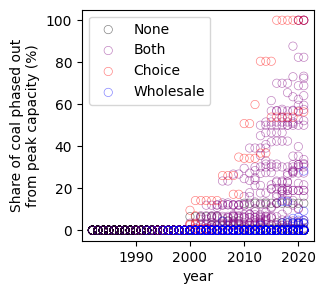

In [136]:
plt.rc('figure', figsize=(3,3))
both_data = sel_col_data[sel_col_data["both_choice_market"]==1]
notboth_data = sel_col_data[sel_col_data["both_choice_market"]==0]
choice_data = notboth_data[notboth_data["R_Choice"]==1]
market_data = notboth_data[notboth_data["R_WholeSale"]==1]
neither_data = notboth_data.query("R_Choice==0").query("R_WholeSale==0")
share_name = "Coal_Share_PhasedOut"
sns.scatterplot(data = neither_data, x="year", y=share_name, facecolor="None",edgecolor="black",alpha=0.5,label="None")
sns.scatterplot(data = both_data, x="year", y=share_name, facecolor="None",edgecolor="purple",alpha=0.5,label="Both")
sns.scatterplot(data = choice_data, x="year", y=share_name, facecolor="None",edgecolor="red",alpha=0.5,label="Choice")
sns.scatterplot(data = market_data, x="year", y=share_name, facecolor="None",edgecolor="blue",alpha=0.5,label="Wholesale")
plt.ylabel("Share of coal phased out\nfrom peak capacity (%)")

In [144]:
choice_data.sort_values(by=share_name,ascending=False)[["Country Code","year",share_name]].query("year==2021")

,Country Code,year,Coal_Share_PhasedOut
3874,BEL,2021,100.000000
3775,SVK,2021,56.342412
